# Nanodegree Engenheiro de Machine Learning
## Modelo de Avaliação e Validação
## Projeto 1: Estimando Preços dos Imóveis de Boston

Bem-vindo ao primeiro projeto do Nanodegree de Engenheiro de Machine Learning! Neste Notebook, alguns templates de código estão sendo fornecidos para você, e você irá precisar implementar funcionalidades adicionais para completar este projeto com sucesso. Você não vai precisar modificar o código que foi incluído além do que está sendo pedido. Seções que começam com **'Implementação'** no cabeçalho indicam que o bloco de código seguinte vai exigir que você providencie funcionalidade adicional. Instruções serão fornecidas para cada seção e as especificidades da implementação são marcadas no bloco de código com o comando 'TODO'. Não esqueça de ler as instruções atentamente!

Além do código implementado, haverá questões relacionadas com o projeto e sua implementação que você deve responder. Cada seção em que há uma questão para você responder, ela será precedida por **'Questão X'** no cabeçalho. Leia cada questão cuidadosamente e dê respostas completas no seguinte box de texto que contém **'Resposta: '**. O projeto enviado será avaliado com base nas respostas para cada uma das questões e a implementação que você nos forneceu.  

>**Nota:** Células de Código e de Markdown podem ser executadas utilizando o atalho de teclado **Shift + Enter**. Além disso, as células Markdown podem ser editadas ao clicar normalmente duas vezes na célula para entrar no modo de edição.

## Antes de começar
Certifique-se que a sua versão do scikit-learn é a mesma que deve ser utilizada neste notebook. Execute a célula abaixo para verificar se sua versão é a ideal. Se você não quiser fazer *downgrade*, você precisa ficar atento as diferenças citadas ao decorrer do código.

In [1]:
import sklearn
print 'The scikit-learn version is ', sklearn.__version__
if sklearn.__version__ >= '0.18':
    print "Você precisa fazer downgrade do scikit-learn ou ficar atento as diferenças nas versões citadas."
    print "Pode ser feito executando:\n"
    print "pip install scikit-learn==0.17"
else:
    print "Tudo certo!"

The scikit-learn version is  0.19.1
Você precisa fazer downgrade do scikit-learn ou ficar atento as diferenças nas versões citadas.
Pode ser feito executando:

pip install scikit-learn==0.17


## Ambiente de análise
Antes de qualquer análise, para auxiliar na reprodutibilidade por outras pessoas, eu gosto de utilizar uma função que mostra de modo detalhado o meu **ambiente de análise** (hardware, software, versões do Python e packages utilizados). A próxima célula define essa função e mostra o meu ambiente.

**ATENÇÃO:** eu fiz essa função para poder reportar meu ambiente de trabalho, em Linux. Não me preocupei em preparar a função para funcionar corretamente em Windows ou Mac, portanto, **a função não deve funcionar em Windows ou Mac!**

In [2]:
def ambienteDaAnalise():
    """
    Abrantes Araújo Silva Filho
    abrantesasf@gmail.com
    
    Imprime informações a respeito do ambiente de análise utilizado,
    incluindo detalhes do hardware, software, versões do Python e
    packages utilizados.
    
    Pré-requisitos: utiliza os packages subprocess, sys, pip, platform,
                    psutil e math
    
    Limitações: essa função foi pensada para sistemas operacionais
                Linux, não testada em Windows ou Mac. Na verdae nem me
                preocupei em preparar a função para funcionar corretamente
                em Windows ou Mac, portanto provavelmente ela NÃO FUNCIONARÁ
                nesses sistemas operacionais!
    
    Inputs: nenhum
    
    Outputs: print de informações
    
    Retorno: nenhum
    """
    import os
    import subprocess
    import sys
    import pip
    import platform
    import psutil
    import math
    
    data = subprocess.check_output(['date', '+%Y-%m-%d, %H:%M (UTC %:z), %A']).replace('\n', '')
    
    nomeComputador = platform.node()
    arquiteturaComputador = platform.machine()
    processador = platform.processor()
    MHz = psutil.cpu_freq()[2] / 1000.0
    coresFisicos = psutil.cpu_count(logical = False)
    coresLogicos = psutil.cpu_count()
    memoriaFisica = math.ceil(psutil.virtual_memory()[0] / 1024 / 1024 / 1024.0)
    
    plataforma = platform.system()
    plataforma2 = sys.platform
    osName = os.name
    versaoSO = platform.version()
    release = platform.release()
    
    versaoPython = platform.python_version()
    implementacaoPython = platform.python_implementation()
    buildPython = platform.python_build()[0] + ', ' + platform.python_build()[1]
    interpreterPython = sys.version.replace('\n', '')
    
    pacotes = sorted(["%s==%s" % (i.key, i.version) \
                      for i in pip.get_installed_distributions()])
    
    print('|-----------------------------------------------------------|')
    print('|                         HARDWARE                          |')
    print('|-----------------------------------------------------------|')
    print('Host:           ' + nomeComputador)
    print('Arquitetura:    ' + arquiteturaComputador)
    print('Processador:    ' + processador + ' de ' + str(MHz) + ' MHz (' \
          + str(coresFisicos) + ' cores físicos e ' + str(coresLogicos) + \
          ' cores lógicos)')
    print('Memória física: ' + str(memoriaFisica) + ' GB')
    print('|-----------------------------------------------------------|')
    print('|                         SOFTWARE                          |')
    print('|-----------------------------------------------------------|')
    print('Plataforma:     ' + plataforma + ' (' + plataforma2 + ', ' + osName \
                                               + ')')
    print('Versão:         ' + versaoSO)
    print('Release:        ' + release)
    print('|-----------------------------------------------------------|')
    print('|                         PYTHON                            |')
    print('|-----------------------------------------------------------|')
    print('Python:         ' + versaoPython)
    print('Implementação:  ' + implementacaoPython)
    print('Build:          ' + buildPython)
    print('Interpreter:    ' + interpreterPython)
    print('|-----------------------------------------------------------|')
    print('|                         PACKAGES                          |')
    print('|-----------------------------------------------------------|')
    for pacote in pacotes:
        print(pacote)
    print('|-----------------------------------------------------------|')
    print('|                         DATA                              |')
    print('|-----------------------------------------------------------|')
    print('A data atual do sistema é: ' + data)

ambienteDaAnalise()

|-----------------------------------------------------------|
|                         HARDWARE                          |
|-----------------------------------------------------------|
Host:           analytics01
Arquitetura:    x86_64
Processador:    x86_64 de 3.3 MHz (2 cores físicos e 4 cores lógicos)
Memória física: 8.0 GB
|-----------------------------------------------------------|
|                         SOFTWARE                          |
|-----------------------------------------------------------|
Plataforma:     Linux (linux2, posix)
Versão:         #29~16.04.2-Ubuntu SMP Tue Jan 9 22:00:44 UTC 2018
Release:        4.13.0-26-generic
|-----------------------------------------------------------|
|                         PYTHON                            |
|-----------------------------------------------------------|
Python:         2.7.14
Implementação:  CPython
Build:          default, Dec  7 2017 17:05:42
Interpreter:    2.7.14 |Anaconda, Inc.| (default, Dec  7 2017, 17:

## Começando
Neste projeto, você irá avaliar o desempenho e o poder de estimativa de um modelo que foi treinado e testado em dados coletados dos imóveis dos subúrbios de Boston, Massachusetts. Um modelo preparado para esses dados e visto como *bem ajustado* pode ser então utilizado para certas estimativas sobre um imóvel – em particular, seu valor monetário. Esse modelo seria de grande valor para alguém como um agente mobiliário, que poderia fazer uso dessas informações diariamente.

O conjunto de dados para este projeto se origina do [repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Housing). Os dados de imóveis de Boston foram coletados em 1978 e cada uma das 489 entradas representa dados agregados sobre 14 atributos para imóveis de vários subúrbios de Boston. Para o propósito deste projeto, os passos de pré-processamento a seguir foram feitos para esse conjunto de dados:
- 16 observações de dados possuem um valor `'MEDV'` de 50.0. Essas observações provavelmente contêm **valores ausentes ou censurados** e foram removidas.
- 1 observação de dados tem um valor `'RM'` de 8.78. Essa observação pode ser considerada **valor atípico (outlier)** e foi removida.
- Os atributos `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` são essenciais. O resto dos **atributos irrelevantes** foram excluídos.
- O atributo `'MEDV'` foi **escalonado multiplicativamente** para considerar 35 anos de inflação de mercado.

** Execute a célula de código abaixo para carregar o conjunto dos dados dos imóveis de Boston, além de algumas bibliotecas de Python necessárias para este projeto. Você vai saber que o conjunto de dados carregou com sucesso se o seu tamanho for reportado. **

In [3]:
# Importar as bibliotecas necessárias para este projeto
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
import matplotlib.pyplot as plt
from sklearn.cross_validation import ShuffleSplit

# Formatação mais bonita para os notebooks
%matplotlib inline

# Executar o conjunto de dados de imóveis de Boston
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Êxito
print "O conjunto de dados de imóveis de Boston tem {} pontos com {} variáveis em cada.".format(*data.shape)

O conjunto de dados de imóveis de Boston tem 489 pontos com 4 variáveis em cada.


/home/abrantesasf/anaconda3/envs/Udacity-Python-2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/abrantesasf/anaconda3/envs/Udacity-Python-2/lib/python2.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


## Explorando os Dados
Na primeira seção deste projeto, você fará uma rápida investigação sobre os dados de imóveis de Boston e fornecerá suas observações. Familiarizar-se com os dados durante o processo de exploração é uma prática fundamental que ajuda você a entender melhor e justificar seus resultados.

Dado que o objetivo principal deste projeto é construir um modelo de trabalho que tem a capacidade de estimar valores dos imóveis, vamos precisar separar os conjuntos de dados em **atributos** e **variável alvo**. O **atributos**, `'RM'`, `'LSTAT'` e `'PTRATIO'`, nos dão informações quantitativas sobre cada ponto de dado. A **variável alvo**, `'MEDV'`, será a variável que procuramos estimar. Eles são armazenados em `features` e ` prices`, respectivamente.

### Minha Análise Exploratória dos Dados
Antes de continuar a responder as questões deste projeto, incluí aqui uma breve análise exploratória para me ajudar a compreender melhor o dataset:

In [4]:
# CONHECIMENTO OS DADOS:
# Primeiras e útlimas observações
print(data.head())
print('')
print(data.tail())

      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0

        RM  LSTAT  PTRATIO      MEDV
484  6.593   9.67     21.0  470400.0
485  6.120   9.08     21.0  432600.0
486  6.976   5.64     21.0  501900.0
487  6.794   6.48     21.0  462000.0
488  6.030   7.88     21.0  249900.0


In [5]:
# Alguma variável tem NA?
data.isna().apply(np.sum)

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [6]:
# OK, nenhuma variável tem NA. Vamos a uma descrição básica das variáveis:
data.describe()

RM       LSTAT     PTRATIO          MEDV
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970000   22.000000  1.024800e+06

In [7]:
# Range das variáveis:
data.max() - data.min()

RM              4.837
LSTAT          35.990
PTRATIO         9.400
MEDV       919800.000
dtype: float64

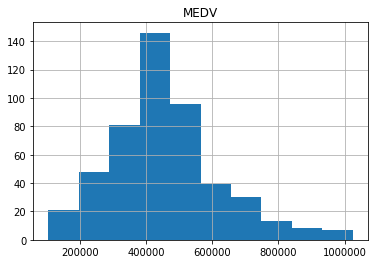

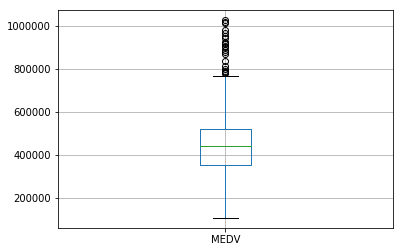

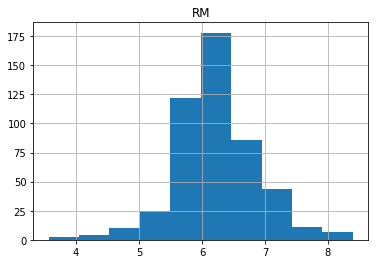

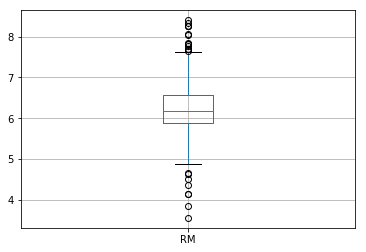

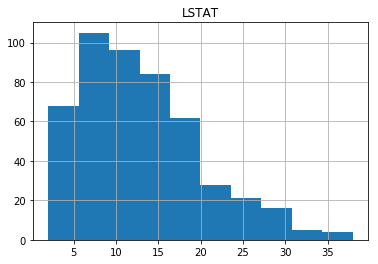

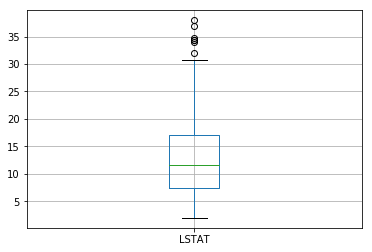

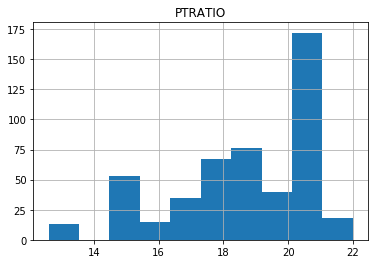

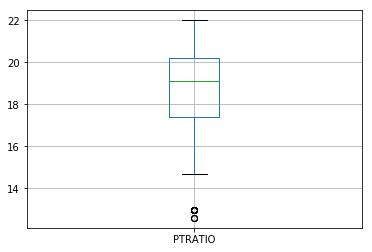

In [8]:
# Vamos ter uma noção visual da distribuição das variáveis:
data.hist('MEDV')
plt.show()
data.boxplot('MEDV')
plt.show()

data.hist('RM')
plt.show()
data.boxplot('RM')
plt.show()

data.hist('LSTAT')
plt.show()
data.boxplot('LSTAT')
plt.show()

data.hist('PTRATIO')
plt.show()
data.boxplot('PTRATIO')
plt.show()

### Implementação: Calcular Estatísticas
Para a sua primeira implementação de código, você vai calcular estatísticas descritivas sobre preços dos imóveis de Boston. Dado que o `numpy` já foi importado para você, use essa biblioteca para executar os cálculos necessários. Essas estatísticas serão extremamente importantes depois para analisar várias estimativas resultantes do modelo construído.

Na célula de código abaixo, você precisará implementar o seguinte:
- Calcular o mínimo, o máximo, a média, a mediana e o desvio padrão do `'MEDV'`, que está armazenado em `prices`.
  - Armazenar cada cálculo em sua respectiva variável.

In [9]:
# TODO: Preço mínimo dos dados
minimum_price = np.min(prices)

# TODO: Preço máximo dos dados
maximum_price = np.max(prices)

# TODO: Preço médio dos dados
mean_price = np.mean(prices)

# TODO: Preço mediano dos dados
median_price = np.median(prices)

# TODO: Desvio padrão do preço dos dados
# Atenção: por padrão o Numpy utiliza N graus de liberdade no denominador do cálculo
# da variância (e, portanto, do desvio padrão). Para igualar o comportamento do cálculo
# do desvio padrão do Numpy com o do Pandas e do R, que utilizam N-1 graus de liberdade
# (Correção de Bessel), utilizei o parâmetro "ddof" abaixo:
std_price = np.std(prices, ddof = 1)

# Mostrar as estatísticas calculadas
print "Estatísticas para os dados dos imóveis de Boston:\n"
print "Preço mínimo: ${:,.2f}".format(minimum_price)
print "Preço máximo: ${:,.2f}".format(maximum_price)
print "Preço médio: ${:,.2f}".format(mean_price)
print "Preço mediano: ${:,.2f}".format(median_price)
print "Desvio padrão dos preços: ${:,.2f}".format(std_price)

Estatísticas para os dados dos imóveis de Boston:

Preço mínimo: $105,000.00
Preço máximo: $1,024,800.00
Preço médio: $454,342.94
Preço mediano: $438,900.00
Desvio padrão dos preços: $165,340.28


### Questão 1 - Observação de Atributos
Para lembrar, estamos utilizando três atributos do conjunto de dados dos imóveis de Boston: `'RM'`, `'LSTAT'` e `'PTRATIO'`. Para cada observação de dados (vizinhança):
- `'RM'` é o número médio de cômodos entre os imóveis na vizinhança.
- `'LSTAT'` é a porcentagem de proprietários na vizinhança considerados de "classe baixa" (proletariado).
- `'PTRATIO'` é a razão de estudantes para professores nas escolas de ensino fundamental e médio na vizinhança.

**Usando a sua intuição, para cada um dos atributos acima, você acha que um aumento no seu valor poderia levar a um _aumento_ no valor do `'MEDV'` ou uma _diminuição_ do valor do `'MEDV'`? Justifique sua opinião para cada uma das opções.**  

**Dica:** Você pode tentar responder pensando em perguntas como:
* Você espera que um imóvel que tem um valor `'RM'` de 6 custe mais ou menos que um imóvel com valor `'RM'` de 7?
* Você espera que um imóvel em um bairro que tem um valor `'LSTAT'` de 15 custe mais ou menos que em um bairro com valor `'LSTAD'` de 20?
* Você espera que um imóvel em um bairro que tem um valor `'PTRATIO'` de 10 custe mais ou menos que em um bairro com `'PTRATIO'` de 15?

**Resposta:** Intuitivamente, pelo senso comum, eu espero que:
* `'RM'` tenha correlação positiva com `'MEDV'`, ou seja, quando `'RM'` aumenta, `'MEDV'` também aumenta.
  * Arrazoado: se o número médio de cômodos na vizinhança aumenta, possivelmente estamos um um local ou bairro com casas de maior tamanho, para pessoas com maior poder aquisitivo; assim, eu espero que o valor das casas também aumente.
* `'LSTAT'` tenha correlação negativa com `'MEDV'`, ou seja, quando `'LSTAT'` aumenta, `'MEDV'` diminui.
  * Arrazoado: se a porcentagem de proprietários na vizinhança considerados de classe baixa aumenta, possivelmente estamos em um local ou bairro com casas de preços mais baixos; assim, eu espero que o valor das casas diminua quando o número de vizinhos de classe baixa aumente.
* `'PTRATIO'` tenha correlação negativa com `'MEDV'`, ou seja, quando `'PTRATION'` diminui, `'MEDV'` aumenta.
  * Arrazoado: se a razão de estudantes para professores nas escolas de ensino fundamental e médio na vizinhança diminui, possivelmente estamos em um local ou bairro onde os pais podem pagar por uma educação mais exclusiva para seus filhos; assim eu espero que quando os pais tem um poder aquisitivo maior, a razão estudante/professor diminui e o valor das casas aumente.

Vou conferir esses meus pressupostos visualmente, com scatters plots na célula abaixo:

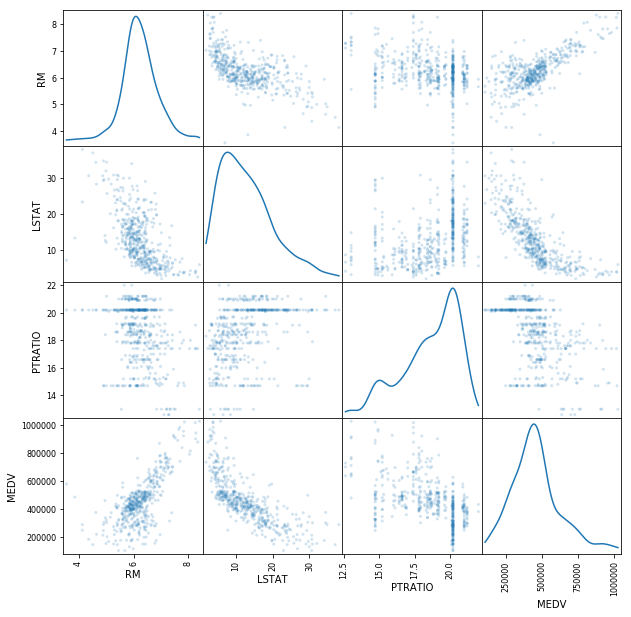

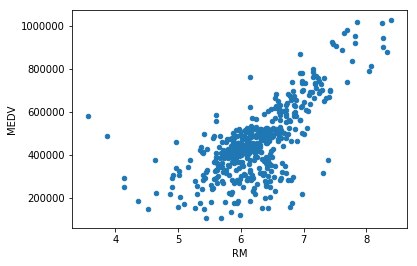

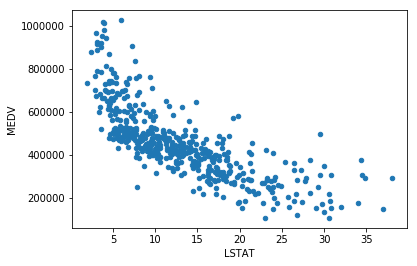

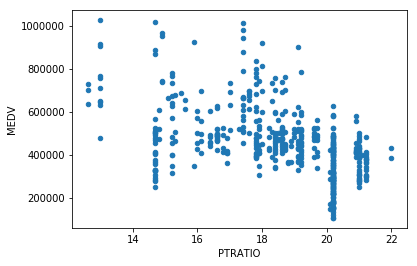

In [10]:
# Scatter Matrix das variáveis, e diagonal com density plots
pd.plotting.scatter_matrix(data, alpha = 0.2, diagonal = 'kde', figsize = (10,10))
plt.show()
data.plot.scatter('RM', 'MEDV')
plt.show()
data.plot.scatter('LSTAT', 'MEDV')
plt.show()
data.plot.scatter('PTRATIO', 'MEDV')
plt.show()

Conforme os gráficos acima parecem sugerir, as duas primeiras suposições entre as relações de `'MEDV'` com as variáveis `'RM'` e `'LSTAT'` estavam corretas.

A relação entre `'PTRATIO'` e `'MEDV'` é mais difícil de estabelecer com certeza, parece uma correlação negativa, mas é difícil dizer pelo scatter plot. Vou fazer um boxplot comparando o `'MEDV'` com valores arredondados ("discretizados" com a função round) da variável `'PTRATIO'`:

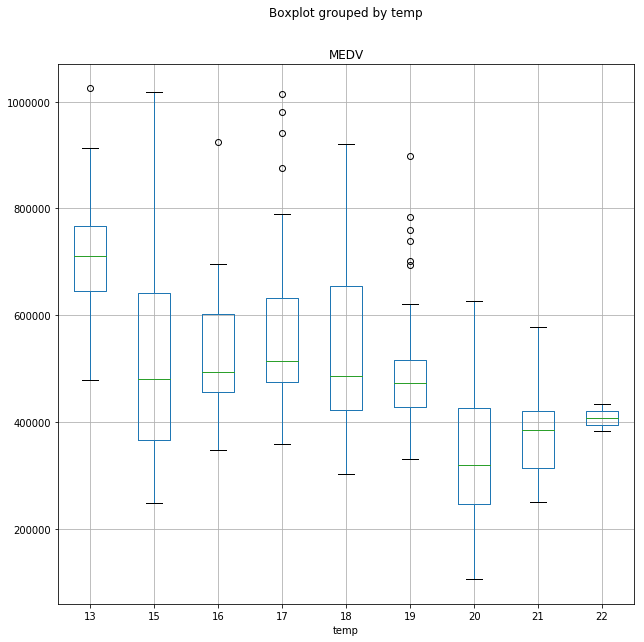

In [11]:
# Adiciona variável temporário ao dataframe, discretizando a PTRATIO como uma string de iteiros (com a função round):
data['temp'] = features['PTRATIO'].apply(round).apply(int).apply(str)

# Faz o boxplot da MEDV por PTRATIO discretizada:
data.boxplot('MEDV', by = 'temp', figsize=(10,10))
plt.show()

# Remove variável temporária:
data = data.drop('temp', axis = 1)

Mesmo com o boxplot acima ainda é difícil estabelecer qualquer correlação conclusiva entre `'PTRATIO'` e `'MEDV'`. O que o gráfico parece indicar é que para `'PTRATIO'` de 13, o valor mediano de `'MEDV'` é bem alto (ao redor de 700.000), e que para `'PTRATIO'` a partir de 20, o valor mediano de `'MEDV'` tende a ser mais baixo (até 400.000). Mas como a variação dos preços em cada faixa é muito grande, nada pode ser dito com certeza. Para uma idéia melhor da relação entre essas variáveis, podemos utilizar um cálculo de correlação ou um modelo de regressão linear simples (célula abaixo).

In [12]:
# Import da função de regressão linear
from sklearn.linear_model import LinearRegression

# Variável dependente
y = prices

# Variável independente
x = data['PTRATIO'].values.reshape(-1, 1)

# Ajuste do modelo
modelo = LinearRegression()
modelo.fit(x, y)
print(modelo.coef_)

[-40647.21475514]


Pela regressão linear simples entre `'PTRATIO'` e `'MEDV'` existe uma correlação negativa entre essas variáveis. O modelo simples (sem considerar outras variáveis de confundimento ou interação) mostra que a cada aumento unitário da `'PTRARIO'` o valor de `'MEDV'` tende a diminuir cerca de 40 mil dólares.

----

## Desenvolvendo um Modelo
Na segunda seção deste projeto, você vai desenvolver ferramentas e técnicas necessárias para um modelo que faz estimativas. Ser capaz de fazer avaliações precisas do desempenho de cada modelo através do uso dessas ferramentas e técnicas ajuda a reforçar a confiança que você tem em suas estimativas.

### Implementação: Definir uma Métrica de Desempenho
É difícil medir a qualidade de um modelo dado sem quantificar seu desempenho durante o treinamento e teste. Isso é geralmente feito utilizando algum tipo de métrica de desempenho, através do cálculo de algum tipo de erro, qualidade de ajuste, ou qualquer outra medida útil. Para este projeto, você irá calcular o [*coeficiente de determinação*](https://pt.wikipedia.org/wiki/R%C2%B2), R<sup>2</sup>, para quantificar o desempenho do seu modelo. O coeficiente de determinação é uma estatística útil no campo de análise de regressão uma vez que descreve o quão "bom" é a capacidade do modelo em fazer estimativas. 

Os valores para R<sup>2</sup> têm um alcance de 0 a 1, que captura a porcentagem da correlação ao quadrado entre a estimativa e o valor atual da **variável alvo**. Um modelo R<sup>2</sup> de valor 0 sempre falha ao estimar a variável alvo, enquanto que um modelo R<sup>2</sup> de valor 1, estima perfeitamente a variável alvo. Qualquer valor entre 0 e 1 indica qual a porcentagem da variável alvo (ao utilizar o modelo) que pode ser explicada pelos **atributos**. *Um modelo pode dar também um R<sup>2</sup> negativo, que indica que o modelo não é melhor do que aquele que estima ingenuamente a média da variável alvo.*

Para a função ‘performance_metric’ na célula de código abaixo, você irá precisar implementar o seguinte:
- Utilizar o `r2_score` do `sklearn.metrics` para executar um cálculo de desempenho entre `y_true` e `y_predict`.
- Atribuir a pontuação do desempenho para a variável `score`.

In [13]:
# TODO: Importar 'r2_score'

def performance_metric(y_true, y_predict):
    """ Calcular e retornar a pontuação de desempenho entre 
        valores reais e estimados baseado na métrica escolhida. """
    
    # Importa a função r2_score:
    from sklearn.metrics import r2_score
    
    # TODO: Calcular a pontuação de desempenho entre 'y_true' e 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Devolver a pontuação
    return score

### Questão 2 - Qualidade do Ajuste
Admita que um conjunto de dados que contém cinco observações de dados e um modelo fez a seguinte estimativa para a variável alvo:

| Valores Reais | Estimativa |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

** Executar a célula de código abaixo para usar a função `performance_metric’ e calcular o coeficiente de determinação desse modelo. **

In [14]:
# Calcular o desempenho deste modelo
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "O coeficiente de determinação, R^2, do modelo é {:.3f}.".format(score)

O coeficiente de determinação, R^2, do modelo é 0.923.


* Você consideraria que esse modelo foi capaz de capturar a variação da variável alvo com sucesso? Por que ou por que não?

** Dica: **
* R2 score com valor 0 significa que a variável dependente não pode ser estimada pela variável independente.
* R2 score com valor 1 significa que a variável dependente pode ser estimada pela variável independente.
* R2 score com valor entre 0 e 1 significa quanto a variável dependente pode ser estimada pela variável independente.
* R2 score com valor 0.40 significa que 40 porcento da variância em Y é estimável por X.

**Resposta:** Sim, pois 92% da variância da variável dependente pôde ser explicada pelo modelo com as variáveis independentes.

### Implementação: Misturar e Separar os Dados
Sua próxima implementação exige que você pegue o conjunto de dados de imóveis de Boston e divida os dados em subconjuntos de treinamento e de teste. Geralmente os dados são também misturados em uma ordem aleatória ao criar os subconjuntos de treinamento e de teste para remover qualquer viés (ou erro sistemático) na ordenação do conjunto de dados.

Para a célula de código abaixo, você vai precisar implementar o seguinte:
- Utilize `train_test_split` do `sklearn.cross_validation` para misturar e dividir os dados de `features` e `prices` em conjuntos de treinamento e teste. (se estiver com a versão do scikit-learn > 0.18, utilizar o `sklearn.model_selection`. Leia mais [aqui](http://scikit-learn.org/0.19/modules/generated/sklearn.cross_validation.train_test_split.html))
  - Divida os dados em 80% treinamento e 20% teste.
  - Mude o `random_state` do `train_test_split` para um valor de sua escolha. Isso garante resultados consistentes.
- Atribuir a divisão de treinamento e teste para X_train`, `X_test`, `y_train` e `y_test`.

In [15]:
# TODO: Importar 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Misturar e separar os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size = 0.2,
                                                    random_state = 1974)

# Êxito
print "Separação entre treino e teste feita com êxito."

Separação entre treino e teste feita com êxito.


### Questão 3 - Treinamento e Teste
* Qual o benefício de separar o conjunto de dados em alguma relação de subconjuntos de treinamento e de teste para um algoritmo de aprendizagem?

**Dica:** O que pode dar errado se não houver uma maneira de testar seu modelo?

**Resposta:** se não separarmos uma proporção dos dados para servir de teste final para o algoritmo de aprendizagem escolhido, não conseguiremos saber se o modelo definido é bom de verdade<!-- pois esse modelo simplesmente repetirá os labels dos dados nos quais ele foi treinado. -->, não conseguiremos estimar seu desempenho e sua capacidade de generalização.

O objetivo do conjunto de teste é estimar a qualidade do modelo em um conjunto de dados em uma situação próxima daquela em que ele irá operar, com dados não vistos na fase de treinamento. Se não temos esses dados de treinamento, não conseguiremos saber como o modelo se comportará com novos dados e assim não saberemos se o modelo é bom e/ou generalizável.

Esse modelo que foi treinado com todos os dados<!-- pareceria ter um escore perfeito de predição--> teria um escore muito bom nos dados de treinamento, mas seria muito ruim na predição de dados que ele não conhece. Essa situação é chamada de **overfitting** e<!--, na prática, significa que o modelo "decorou" os labels mas não "aprendeu" realmente como prever os resultados a partir das características dos dados.--> significa que o modelo treinado não é generalizável.

Dividir o conjunto de dados em dados de treinamento e dados de teste garante que o modelo deverá aprender com um subconjunto de dados e que será testado com um novo conjunto de dados que o modelo não conhece e os resultados da predição nesse novo conjunto de dados poderão nos confirmar se o modelo é bom ou não.

----

## Analisando o Modelo de Desempenho
Na terceira parte deste projeto, você verá o desempenho em aprendizagem e teste de vários modelos em diversos subconjuntos de dados de treinamento. Além disso, você irá investigar um algoritmo em particular com um parâmetro `'max_depth'` (profundidade máxima) crescente, em todo o conjunto de treinamento, para observar como a complexidade do modelo afeta o desempenho. Plotar o desempenho do seu modelo baseado em critérios diversos pode ser benéfico no processo de análise, por exemplo: para visualizar algum comportamento que pode não ter sido aparente nos resultados sozinhos.

### Curvas de Aprendizagem
A célula de código seguinte produz quatro gráficos para um modelo de árvore de decisão com diferentes níveis de profundidade máxima. Cada gráfico visualiza a curva de aprendizagem do modelo para ambos treinamento e teste, assim que o tamanho do conjunto treinamento aumenta. Note que a região sombreada da curva de aprendizagem denota a incerteza daquela curva (medida como o desvio padrão). O modelo é pontuado em ambos os conjuntos treinamento e teste utilizando R<sup>2</sup>, o coeficiente de determinação.  

**Execute a célula de código abaixo e utilizar esses gráficos para responder as questões a seguir.**

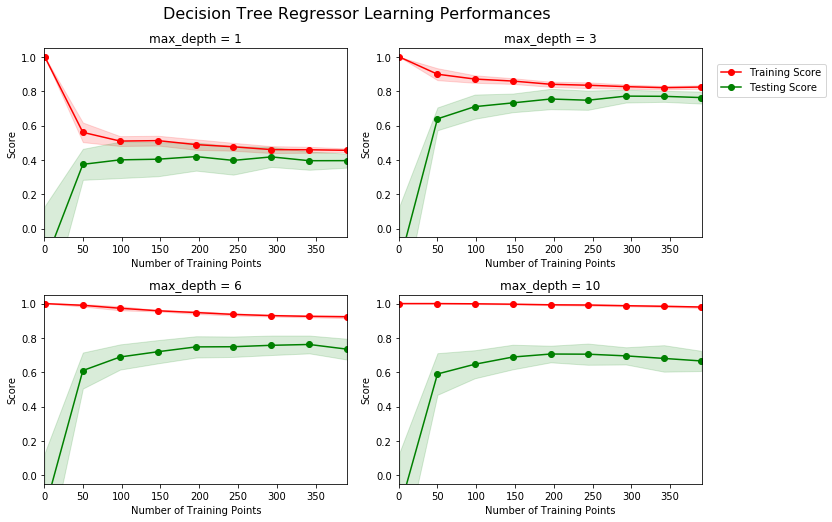

In [16]:
# Criar curvas de aprendizagem para tamanhos de conjunto de treinamento variável e profundidades máximas
vs.ModelLearning(features, prices)

### Questão 4 - Compreendendo os Dados
* Escolha qualquer um dos gráficos acima e mencione a profundidade máxima escolhida.
* O que acontece com a pontuação da curva de treinamento se mais pontos de treinamento são adicionados? E o que acontece com a curva de teste?
* Ter mais pontos de treinamento beneficia o modelo?

**Dica:** As curvas de aprendizagem convergem para uma pontuação em particular? Geralmente, quanto mais dados você tem, melhor. Mas, se sua curva de treinamento e teste estão convergindo com um desempenho abaixo do benchmark, o que seria necessário? Pense sobre os prós e contras de adicionar mais pontos de treinamento baseado na convergência das curvas de treinamento e teste.

**Resposta:**
* *Primeira pergunta*: pelos quatro gráficos de Learning Curves apresentados, eu escolheria como o melhor modelo a árvore de decisão com `max_depth = 3`, já que esse modelo apresentou um bom resultado (menos erros) tanto no conjunto de treinamento quanto no conjunto de teste.
  * Também podemos ver que a característica de convergência das curvas de treinamento e de teste em um nível de erro baixo (conforme indicado pelo alto score) é característica de modelos mais próximos ao ideal, sem overfitting nem underfitting. A característica de convergência das curvas nos modelos mais próximos ao ideal é a seguinte:
    * Curva de Treinamento: começa com poucos erros (escore alto) e, à medida em que mais pontos de treinamento são adicionados, a curva começa a apresentar mais erros (e o escore diminui um pouco), mas mesmo assim ainda apresenta escore bom (poucos erros)
    * Curva e Teste: começa com muito erros (escore baixo) e, à medida em que mais pontos de teste são adicionados, a curta começa a apresentam menos erros (e o escore aumenta bastante)
    * Característica da Convergência: as curvas de treinamento e teste tendem a convergir em um nível baixo de erro (escore alto)
    
    
* *Segunda pergunta*: quando mais pontos de treinamento são adicionados, as características das Learning Curves variará conforme o ajuste do modelo, se mais próximo do ideal, se está com underfitting ou com overfitting. Em geral:
  * Modelos mais próximos do ideal:
    * Curva de Treinamento: começa com poucos erros (escore alto) e, à medida em que mais pontos de treinamento são adicionados, a curva começa a apresentar mais erros (e o escore diminui um pouco), mas mesmo assim ainda apresenta escore bom (poucos erros)
    * Curva e Teste: começa com muito erros (escore baixo) e, à medida em que mais pontos de teste são adicionados, a curta começa a apresentam menos erros (e o escore aumenta bastante)
    * Característica da Convergência: as curvas de treinamento e teste tendem a convergir em um nível baixo de erro (escore alto)
  * Modelos com underfitting:
    * Curva de Treinamento: começa com poucos erros (escore alto) e, à medida em que mais pontos de treinamento são adicionados, a curva começa a apresentar mais erros (e o escore diminui bastante), passando a apresentar um escore ruim (em um nível mais alto de erros)
    * Curva e Teste: começa com muito erros (escore baixo) e, à medida em que mais pontos de teste são adicionados, a curta começa a apresentam um pouco menos de erro, mas o escore continua baixo
    * Característica da Convergência: as curvas de treinamento e teste tendem a convergir em um nível alto de erro (escore baixo)
  * Modelos com overfitting:
    * Curva de Treinamento: começa com poucos erros (escore alto) e, à medida em que mais pontos de treinamento são adicionados, os erros aumentam muito pouco ou quase nada, mantendo um escore bem alto
    * Curva e Teste: começa com muito erros (escore baixo) e, à medida em que mais pontos de teste são adicionados, a curta começa a apresentar um pouco menos de erro, mas o escore continua baixo
    * Característica da Convergência: como a curva de treinamento apresenta escore muito alto e a curva de teste apresenta escore muito baixo as curvas não tendem à convergência, ao contrário: tendem a ficar separadas (quanto mais separadas, maior o overfitting)
    
    
* *Terceira pergunta*: sim, ter mais pontos de treinamento beneficia o modelo que pode "aprender" a partir de uma base com maior variabilidade e, assim, ser capaz de ser mais generalizável. O limite é que não podemos utilizar *todos* os pontos do dataset para o treinamento pois isso poderia levar a uma situação de overfitting e diminuir a capacidade preditiva para novos dados.

### Curvas de Complexidade
A célula de código a seguir produz um gráfico para um modelo de árvore de decisão que foi treinada e validada nos dados de treinamento utilizando profundidades máximas diferentes. O gráfico produz duas curvas de complexidade – uma para o treinamento e uma para a validação. Como a **curva de aprendizagem**, a área sombreada de ambas as curvas de complexidade denota uma incerteza nessas curvas, e o modelo pontuou em ambos os conjuntos de treinamento e validação utilizando a função `performance_metric`.  

** Execute a célula de código abaixo e utilize o gráfico para responder as duas questões a seguir. **

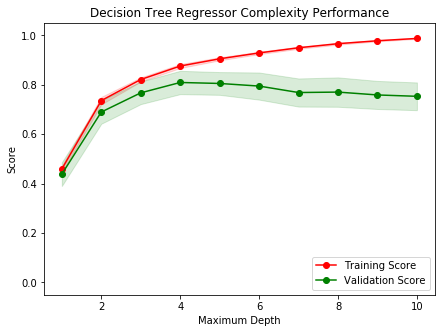

In [17]:
vs.ModelComplexity(X_train, y_train)

### Questão 5 - Equilíbrio entre viés e variância
* Quando o modelo é treinado com o profundidade máxima 1, será que o modelo sofre mais de viés (erro sistemático) ou variância (erro aleatório)?
* E o que acontece quando o modelo é treinado com profundidade máxima 10? Quais pistas visuais existem no gráfico para justificar suas conclusões?

**Dica:** Como você sabe que um modelo está experimentando viés alto ou variância alta? Viés alto é um sinal de *underfitting* (o modelo não é complexo o suficiente para aprender os dados) e alta variância é um sinal de *overfitting* (o modelo está "decorando" os dados e não consegue generalizar bem o problema). Pense em modelos (com profundidade de 1 e 10, por exemplo) e qual deles está alinhado com qual parte do equilíbrio.

**Respostas:**
* *Primeira pergunta*: o modelo com `max_depth = 1` está sofrendo mais de viés (erro sistemático) pois o modelo não é complexo o suficiente para captar toda as características que podem ser aprendidas com os dados e, assim, sistematicamente, ele não consegue fazer uma boa predição. Esse modelo sofre de underfitting.


* *Segunda pergunta*: o modelo com `max_depth = 10` está sofrendo mais de variância (erro aleatório) pois o modelo foi tão complexo que, na verdade, ele não "aprendeu" realmente com os dados, ele praticamente "decorou" os dados e se ajustou perfeitamente ao dataset e, assim, ele não consegue fazer uma boa predição pois ele não é generalizável o suficiente para captar a variabilidade que pode existir em novos dados. Esse modelo sofre de overfitting. Visualmente o Complexity Model Graph mostra que, a partir de `max_depth = 5` o escore na curva de treinamento é cada vez melhor, aproximando-se de 1.0, e o escore na curva de validação começa a diminuir fazendo com que as curvas se distanciem. Isso é característico de um modelo com overfitting: bons escores no treinamento, mas escores baixos no teste. O gráfico mostra esse distanciamento das curvas de modo bem claro.

### Questão 6 - Modelo Ótimo de Melhor Suposição
* Qual profundidade máxima (`'max_depth'`) você acredita que resulta em um modelo que melhor generaliza um dado desconhecido?
* Que intuição te levou a essa resposta?

**Dica: ** Olhe no gráfico acima e veja o desempenho de validação para várias profundidades atribuidas ao modelo. Ele melhora conforme a profundidade fica maior? Em qual ponto nós temos nosso melhor desempenho de validação sem supercomplicar nosso modelo? E lembre-se, de acordo com a [Navalha de Occam](https://pt.wikipedia.org/wiki/Navalha_de_Occam), sempre devemos optar pelo mais simples ao complexo se ele conseguir definir bem o problema.

**Resposta:**
Eu escolheria como melhor o modelo com `max_depth = 3` pois apresenta um número baixo de erros tanto no conjunto de treinamento quanto no conjunto de teste, conforme pode-se observer pelo Model Complexity Graph acima.

O modelo com `max_depth = 4` também seria um bom candidato com nível de erro um pouco mais baixo que o modelo com `max_depth = 3`, mas eu não escolheria o modelo com profundidade 4 pois o ganho em relação ao modelo com profundidade 3 é pequeno e, em contrapartida, a complexidade do modelo aumentaria muito.

-----

## Avaliando o Desempenho do Modelo
Nesta parte final do projeto, você irá construir um modelo e fazer uma estimativa de acordo com o conjunto de atributos do cliente utilizando um modelo otimizado a partir de `fit_model`.

### Questão 7 - Busca em Matriz
* O que é a técnica de busca em matriz (*grid search*)?
* Como ela pode ser aplicada para otimizar um algoritmo de aprendizagem?

** Dica: ** Quando explicar a técnica de busca em matriz, tenha certeza que você explicou o motivo dela ser usada, o que a 'matriz' significa nesse caso e qual o objetivo da técnica. Para ter uma resposta mais sólida, você pode também dar exemplo de um parâmetro em um modelo que pode ser otimizado usando essa técnica.

**RESPOSTA DA PRIMEIRA PERGUNTA:**
Antes de explicar o que é a *grid search* temos que diferenciar o que são os **parâmetros** e os **hiperparâmetros** de um algoritmo de aprendizagem.

Os **parâmetros** de um modelo de aprendizagem são obtidos a partir do treinamento do modelo, por exemplo: em um modelo de regressão linear ou de regressão logística, os parâmetros estimados são os valores para cada coeficiante do modelo. 

Vejamos na prática um exemplo. Um modelo de regressão linear poderia nos fornecer o sequinte resultado (valores fictícios):

\begin{equation}
MEDV = 100000 + 200000 \times RM - 40000 \times LSTAT - 5000 \times PTRATIO
\end{equation}

Na regressão linear acima, os **parâmetros** são os valores estimados para cada coeficiente do modelo. Eles são determinados a partir do próprio treinamento do modelo.

Os **hiperparâmetros** são outra coisa: eles são parâmetros que devem ser *definidos ANTES que o processo de treinamento e aprendizagem do modelo comece*, são uma espécie de "pressupostos" que nosso modelo utilizará para proceder com o treinamento.

Nem todos os algoritmos utilizam hiperparâmetros, por exemplo: regressão linear simples não utiliza nenhum hiperparâmetro, mas SVM utiliza 2 hiperparâmetros principais (o Kernel e o Gamma).

Note que como os **hiperparâmetros** devem ser definidos ANTES do aprendizado do modelo, uma tarefa importante é *determinar a melhor combinação de hiperparâmetros* para que o modelo tenha boa capacidade preditiva. Isso é chamado de **otimização de hiperparâmetros** e é o processo de escolher o melhor conjunto de hiperparâmetros para o algoritmo de aprendizagem em uso.

E uma das técnicas de otimização de hiperparâmetros é a **GRID SEARCH**, que consiste em uma busca manual e exaustiva em um subconjunto de hiperparâmetros do algoritmo de aprendizagem (uma matriz de hiperparâmetros) guiada por alguma métrica de performance (tipicamente determinada por cross-validation ou por validação em um conjunto de dados de validação separado do conjunto de dados de teste).

Um exemplo concreto ajudará a esclarecer o conceito de Grid Search: considere que vamos treinam um algoritmo de SVM. Esse algoritmo tem 2 hiperparâmetros principais, o *Kernel* e o *Gamma* (existem outros hiperparâmetros para a SVM, mas vamos considerar inicialmente somente esses dois). O *Kernel* pode ser escolhido entre as opções `rbf`, `linear`, `poly`, `sigmoid`, e o *Gamma* é um valor numérico real positivo (para os Kernels rbf, poly ou sigmoid).

Como podemos então estabelecer a melhor combinação entre esses hiperparâmetros, sendo que o Kernel é um valor nominal e o Gamme é um valor real positivo? Bem, aqui usamos a GRID SEARCH e construímos uma matriz com os valores possíveis do Kernel e com alguns valores escolhidos do Gamma (geralmente em escala logarítmica para abranger uma grande quantidade de valores). Nossa matriz poderia se parecer com a seguinte:

| Gamma \ Kernel | rbf | poly | sigmoid |
|----------------|:---:|:----:|:-------:|
| 0,1            |     |      |         |
| 1              |     |      |         |
| 10             |     |      |         |
| 100            |     |      |         |

Agora treinaremos nosso modelo de SVM para cada combinação de Kernel/Gamma definida em nossa matriz e utilizamos alguma métrica de avaliação (obtida, por exemplo, por cross-validation) como o F1 Score e verificamos qual combinação foi a de melhor desempenho (no exemplo fictício abaixo, a melhor combinação foi com Kernel rfb e gamma de 100):

| Gamma \ Kernel |      rbf |     poly |  sigmoid |
|----------------|---------:|---------:|---------:|
| 0,1            | F1 = 0,2 | F1 = 0,4 | F1 = 0,4 |
| 1              | F1 = 0,3 | F1 = 0,5 | F1 = 0,3 |
| 10             | F1 = 0,6 | F1 = 0,6 | F1 = 0,2 |
| 100            | **F1 = 0,8** | F1 = 0,6 | F1 = 0,2 |

Note que o processo da GRID SEARCH pode se tornar bastante complexo se o número de hiperparâmetros a serem definidos é maior do que 2. Com 3 hiperparâmetros, teríamos uma matriz tridimensional para testar (o produto cartesiano entre o conjunto de todos os valores possíveis dos hiperparâmetros) e com 4 hiperparâmetros teríamos uma matriz de quatro dimensões para testar. Quanto maior o número de hiperparâmetros, mais complexa fica a GRID SEARCH.

**RESPOSTA DA SEGUNDA PERGUNTA:**
Conforme já demonstrado na resposta anterior, a GRID SEARCH é uma das técnicas que podem ser utilizadas na otimização de hiperparâmetros para nos ajudar a decidir qual a combinação ótima desses hiperparâmetros que levam ao melhor algoritmo de aprendizagem.

### Questão 8 - Validação Cruzada
* O que é a técnica de treinamento de validação-cruzada k-fold?
* Quais benefícios essa técnica proporciona para busca em matriz ao otimizar um modelo?

**Dica:** Lembre-se de expllicar o que significa o 'k' da validação-cruzada k-fold, como a base de dados é dividida e quantas vezes ela é executada.

Assim como há um raciocínio por trás de utilizar um conjunto de teste, o que poderia dar errado ao utilizar busca em matriz sem um conjunto de validação cruzada? Você pode utilizar a [documentação](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) para basear sua resposta.

**RESPOSTA DA PRIMEIRA PERGUNTA:**
Uma das principais questões que o cientista de dados tem que responder é determinar se o algoritmo de treinamento e o modelo resultante é bom, ou seja, se é capaz de prever bem a variável resposta, sendo generalizável para novos dados. Para esse treinamento e avaliação, algumas situações são possíveis:
* *__Usar todos os dados para treinamento__*: uma possibilidade é usar todos os dados para treinamento do modelo. Isso é absolutamente ineficaz e errado pois simplesmente não poderemos determinar se o modelo é bom. Se todos os dados foram utilizados para treinamento, como podemos saber se o modelo é generalizável? Não temos mais nenhum dado para testar e esse modelo provavelmente sofrerá de muito overfitting.


* *__Usar um conjunto de treinamento e um conjunto de teste__*: dividir os dados em dois conjuntos separados (treinamento e teste) já permite que o modelo treinado seja avaliado para determinar se é bom. A idéia aqui é treinar o modelo e estimar os parâmetros com os dados de treinamento, e testar a qualidade do modelo em um conjunto de dados de teste que segue a mesma distribuição de probabilidade dos dados de treinamento (na prática os dados são divididos aleatoriamente em dados de treinamento e de teste, garantindo assim que os dados de teste sejam representativos dos dados de treinamento). Mas essa abordagem também tem um problema: se quisermos otimizar os hiperparâmetros dos algoritmos em uma Grid Search, por exemplo, *__não podemos utilizar os dados de teste__*, pois o conhecimento dos resultados com os dados de teste poderia influenciar a escolha dos hiperparâmetros e assim gerar overfitting e diminuir a capacidade e generalização do modelo. Os dados de teste devem ser utilizados somente no final de todo o processo, para determinar a qualidade geral do modelo: não podem ser utilizados durante o processo de treinamento em si.


* *__Usar um conjunto de treinamento, um conjunto de validação e um conjunto de teste__*: dividindo os dados em três conjuntos separados (mas com a mesma ditribuição de probabilidade do conjunto de treinamento) podemos treinar o modelo com o conjunto de dados de treinamento, validar os modelos e otimizar os hiperparâmetros com o conjunto de dados de valiação e, após a escolha do modelo final, testar a qualidade do modelo com o conjunto de dados de teste. Essa é a melhor abordagem: usamos conjuntos de dados separados para o treinamento, validação e teste. Entretanto, essa abordagem apresenta uma desvantagem: ao separarmos o conjunto de teste dos dados, já estamos diminuindo a quantidade de dados disponíveis para o treinamento do modelo; e ao separarmos mais um conjunto de dados, para a validação, estaremos diminuindo drasticamente ainda mais os dados disponíveis para o treinamento e isso pode causar um efeito indesejável: os resultados do modelo podem variar muito dependendo da escolha aleatória dos conjuntos de treinamento e validação. É para resolver esse problema que utilizamos a **Cross-Validation**.

A **Cross-Validation** é uma técnica de validação para verificar como os resultados de um modelo são generalizáveis para outros conjuntos de dados, ou seja, é uma abordagem para avaliar a qualidade de nosso modelo, *sem utilizar os dados de teste durante a validação*.

De modo geral o conceito de cross-validation envolve particionar os dados de treinamento em subconjuntos complementares, realizar o treinamento do modelo em um subconjunto (que passa a ser considerado como o conjunto de treinamento), e validar o modelo obtido com o outro subconjunto (que passa a ser considerado como o conjunto de validação). Além disso, para reduzir a variabilidade, a maioria dos métodos de cross-validation é realizada usando uma forma de "rodízio", onde múltiplas rodadas de cross-validation são realizadas e, a cada rodada, o modelo é treinado e validado utilizando diferentes partições dos dados. O resultado final da validação é dado por alguma forma de combinação dos resultados de cada rodada (por exemplo, a média) para estimar a qualidade do modelo preditivo treinado.

Em resumo, técnicas de cross-validation combinam métricas de avaliação do modelo para obter uma informação mais precisa a respeito da performance preditiva do modelo.

Existem diversas técnicas para a realização da cross-validation, tais como:
* Cross-validation exaustiva: são métodos que realizam o treinamento e a validação em todas as maneiras possíveis de dividir os dados em conjuntos de treinamento e validação. As mais comuns são:
  * Leave-p-out cross-validation
  * Leave-one-out corss-validation
* Cross-validation não-exaustiva: são métodos que realizam o treinamento e a validação em algumas das maneiras possíveis de dividir os dados em conjuntos de treinamento e validação. As mais comuns são:
  * K-Fold Cross-Validation
  * Holdout
  * Repeated random sub-sampling

A **K-Fold Cross-Validation** é uma técnica de validação cruzada não exaustiva que divide **aleatoriamente** o conjunto de dados de treinamento (sendo que o conjunto de dados de teste já foi separado previamente) em **K** grupos de mesmo tamanho. Desses K grupos, um é escolhido para ser considerado como conjunto de validação, e o restante dos **K - 1** grupos são utilizados no treinamento do modelo. Esse procedimento de validação é repetido **K** vezes, cada vez utilizando um grupo diferente como dados de validação. Esses **K** resultados diferentes são combinados e a média deles é utilizada como estimativa da qualidade do modelo.

O número exato de K grupos é sujeito a debate, sendo comuns valores de 4, 5 ou 10 grupos.

Como um exemplo, vamos considerar um dataset com 100 observações. Separamos 20% dos dados para teste, e ficamos com 80 observações para treinamento. Dessas 80 observações, faremos uma K-Fold Cross-Validation usando `K = 4`, ou seja, dividiremos as 80 observações em 4 grupos de igual tamanho (20 observações em cada grupo). Chamaremos esses grupos de A, B, C e D. O processo de K-Fold Cross-validation é então repedito K vezes (em nosso exemplo, 4 vezes) e, em cada repetição, um grupo diferente é utilizado como validação, e o restante dos grupos (`K - 1`, 3 em nosso exemplo) será utilizado para treinamento:

| **Rodada** | **Grupo de Validação** | **Grupos de Treinamento** |
|:----------:|:----------------------:|:-------------------------:|
|      1     |            A           |          B, C, D          |
|      2     |            B           |          A, C, D          |
|      3     |            C           |          A, B, D          |
|      4     |            D           |          A, B, C          |

A média dos K resultados das métricas de avaliação desse modelo será considerada como a avaliação do modelo.

**RESPOSTA DA SEGUNDA PERGUNTA:**
A K-Fold Cross-Validation nos permite validar os modelos e otimizar os hiperparâmetros através de algum processo de otimização, como o Grid Search, sem que os dados de teste tenham qualquer influência no processo de treinamento e validação. Especificamente para a Grid Search, o maior benefício da K-Fold Cross Validation é que todos os dados são utilizados para treinamento e validação (K - 1 vezes como treinamento, e 1 vez como validação), nos dando uma maior segurança que não estamos superestimando ou subestimando a qualidade do modelo (o que terima maior chance de ocorrer se estivéssemos usando somente 1 grupo de validação fixo).<!--nos permite obter o conjunto de hiperparâmetros que apresenta a melhor métrica de avaliação, ou seja, o modelo que foi capaz de prever os resultados da melhor forma.-->

### Implementação: Ajustar um Modelo
Na sua última implementação, você vai precisar unir tudo o que foi aprendido e treinar um modelo utilizando o **algoritmo de árvore de decisão**. Para garantir que você está produzindo um modelo otimizado, você treinará o modelo utilizando busca em matriz para otimizar o parâmetro de profundidade máxima (`'max_depth'`) para uma árvore de decisão. Esse parâmetro pode ser entendido como o número de perguntas que o algoritmo de árvore de decisão pode fazer sobre os dados antes de fazer uma estimativa. Árvores de decisão são parte de uma classe de algoritmos chamados *algoritmos de aprendizagem supervisionada*.

Além disso, você verá que a implementação está usando o `ShuffleSplit()` como alternativa para a validação cruzada (veja a variável `cv_sets`). Ela não é a técnica que você descreveu na **Questão 8**, mas ela é tão útil quanto. O `ShuffleSplit()` abaixo irá criar 10 (`n_splits`) conjuntos misturados e 20% (`test_size`) dos dados serão utilizados para validação. Enquanto estiver trabalhando na sua implementação, pense nas diferenças e semelhanças com a validação k-fold.

** Fique atento que o `ShuffleSplit` tem diferentes parâmetros nas versões 0.17 e 0.18/0.19 do scikit-learn.**
* [Versão 0.17](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.ShuffleSplit.html#sklearn.cross_validation.ShuffleSplit) - `ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, indices=None, random_state=None, n_iterations=None)`
* [Versão 0.18](http://scikit-learn.org/0.18/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit) - `ShuffleSplit(n_splits=10, test_size=’default’, train_size=None, random_state=None)`

Para a função `fit_model` na célula de código abaixo, você vai precisar implementar o seguinte:
- Utilize o [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) do `sklearn.tree` para gerar um objeto regressor de árvore de decisão.
  - Atribua esse objeto à variável `'regressor'`.
- Gere um dicionário para `'max_depth'` com os valores de 1 a 10 e atribua isso para a variável `'params'`.
- Utilize o [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) do `sklearn.metrics` para gerar um objeto de função de pontuação.
  - Passe a função `performance_metric` como um parâmetro para esse objeto.
  - Atribua a função de pontuação à variável `'scoring_fnc'`.
- Utilize o [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) do `sklearn.grid_search` para gerar um objeto de busca por matriz.
  - Passe as variáveis `'regressor'`, `'params'`, `'scoring_fnc'` and `'cv_sets'` como parâmetros para o objeto. 
  - Atribua o objeto `GridSearchCV` para a variável `'grid'`.

In [18]:
# TODO: Importar 'make_scorer', 'DecisionTreeRegressor' e 'GridSearchCV'
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Desempenhar busca em matriz sobre o parâmetro the 'max_depth' para uma 
        árvore de decisão de regressão treinada nos dados de entrada [X, y]. """
    
    # Gerar conjuntos de validação-cruzada para o treinamento de dados
    # sklearn versão 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versão 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Gerar uma árvore de decisão de regressão de objeto
    regressor = DecisionTreeRegressor(random_state = 1974)

    # TODO: Gerar um dicionário para o parâmetro 'max_depth' com um alcance de 1 a 10
    params = {'max_depth': range(1,11)}

    # TODO: Transformar 'performance_metric' em uma função de pontuação utilizando 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Gerar o objeto de busca em matriz
    grid = GridSearchCV(estimator = regressor,
                        param_grid = params,
                        scoring = scoring_fnc,
                        cv = cv_sets)

    # Ajustar o objeto de busca em matriz com os dados para calcular o modelo ótimo
    grid = grid.fit(X, y)

    # Devolver o modelo ótimo depois de realizar o ajuste dos dados
    return grid.best_estimator_

### Fazendo Estimativas
Uma vez que o modelo foi treinado em conjunto de dados atribuído, ele agora pode ser utilizado para fazer estimativas em novos conjuntos de entrada de dados. No caso do *regressor da árvore de decisão*, o modelo aprendeu *quais são as melhores perguntas sobre a entrada de dados*, e pode responder com uma estimativa para a **variável alvo**. Você pode utilizar essas estimativas para conseguir informações sobre os dados dos quais o valor da variável alvo é desconhecida – por exemplo, os dados dos quais o modelo não foi treinado.

### Questão 9 - Modelo Ótimo
* Qual profundidade máxima do modelo ótimo? Como esse resultado se compara com a sua suposição na **Questão 6**?  

** Executar a célula de código abaixo para ajustar o regressor da árvore de decisão com os dados de treinamento e gerar um modelo ótimo. **

In [19]:
# Ajustar os dados de treinamento para o modelo utilizando busca em matriz
reg = fit_model(X_train, y_train)

# Produzir valores para 'max_depth'
print "O parâmetro 'max_depth' é {} para o modelo ótimo.".format(reg.get_params()['max_depth'])

O parâmetro 'max_depth' é 4 para o modelo ótimo.


**Dica: ** A resposta vem da saída do código acima.

**Resposta:**
Através do uso da Grid Search e Cross-Validation, o melhor modelo de árvore de decisão é o modelo com `max_depth = 4`. Na Questão 6 eu tinha apontado que o modelo com profundidade 3 seria melhor pois o ganho na qualidade do modelo com 4 níveis de profundidade talvez não superasse a desvantagem de usar um modelo mais complexo.

### Questão 10 - Estimando Preços de Venda
Imagine que você era um corretor imobiliário na região de Boston ansioso para utilizar esse modelo que ajuda os imóveis que seus clientes desejam vender. Você coletou as seguintes informações de três dos seus clientes:

| Atributos | Cliente 1 | Cliente 2 | Cliente 3 |
| :---: | :---: | :---: | :---: |
| Número total de cômodos em um imóvel | 5 cômodos | 4 cômodos | 8 cômodos |
| Nível de pobreza da vizinhança (em %) | 17% | 32% | 3% |
| Razão estudante:professor das escolas próximas | 15-to-1 | 22-to-1 | 12-to-1 |
* Qual valor você sugeriria para cada um dos seus clientes para a venda de suas casas?
* Esses preços parecem razoáveis dados os valores para cada atributo?*  

**Dica:** Utilize as estatísticas que você calculou na seção **Explorando Dados** para ajudar a justificar sua resposta. Dos três clientes, o Cliente 3 tem a maior casa, no melhor bairro de escolas públicas e menor inídice de pobreza; Cliente 2 tem a menor casa, em um bairro com índice de pobreza relativamente alto e sem as melhores escolas públicas.

** Execute a célula de códigos abaixo para que seu modelo otimizado faça estimativas para o imóvel de cada um dos clientes.**

In [20]:
# Gerar uma matriz para os dados do cliente
client_data = [[5, 17, 15], # Cliente 1
               [4, 32, 22], # Cliente 2
               [8, 3, 12]]  # Cliente 3

# Mostrar estimativas
for i, price in enumerate(reg.predict(client_data)):
    print "Preço estimado para a casa do cliente {}: ${:,.2f}".format(i+1, price)

Preço estimado para a casa do cliente 1: $414,184.62
Preço estimado para a casa do cliente 2: $230,452.17
Preço estimado para a casa do cliente 3: $896,962.50


In [21]:
# Características das casas com valores MUITO próximos aos do primeiro ciente (mais ou menos 1/30 std):
data[(data['MEDV'] > 414184.162 - std_price/30) & (data['MEDV'] < 414184.62 + std_price/30)].sort_values('MEDV')

RM  LSTAT  PTRATIO      MEDV
445  6.317  13.99     20.2  409500.0
105  5.851  16.47     20.9  409500.0
106  5.836  18.66     20.9  409500.0
325  5.869   9.80     20.2  409500.0
151  5.404  13.28     14.7  411600.0
21   5.965  13.83     21.0  411600.0
59   5.927   9.22     19.7  411600.0
131  6.326  12.26     21.2  411600.0
454  6.229  12.87     20.2  411600.0
479  5.390  21.14     19.2  413700.0
50   5.963  13.45     16.8  413700.0
319  6.144   9.09     16.9  415800.0
108  6.474  12.27     20.9  415800.0
306  5.782  15.94     18.4  415800.0
350  6.251  14.19     20.2  417900.0
448  5.759  14.13     20.2  417900.0
453  6.167  16.29     20.2  417900.0
15   5.834   8.47     21.0  417900.0

In [22]:
# Características das casas com valores MUITO próximos aos do segundo ciente (mais ou menos 1/30 std):
data[(data['MEDV'] > 230452.17 - std_price/10) & (data['MEDV'] < 230452.17 + std_price/10)].sort_values('MEDV')

RM  LSTAT  PTRATIO      MEDV
362  6.223  21.78     20.2  214200.0
371  4.880  30.62     20.2  214200.0
409  5.837  15.69     20.2  214200.0
363  6.968  17.21     20.2  218400.0
400  5.304  26.64     20.2  218400.0
369  4.652  28.28     20.2  220500.0
423  5.818  22.11     20.2  220500.0
427  5.854  23.79     20.2  226800.0
364  6.545  21.08     20.2  228900.0
410  6.202  14.52     20.2  228900.0
411  6.193  21.52     20.2  231000.0
365  5.536  23.60     20.2  237300.0
372  5.390  20.85     20.2  241500.0
407  5.565  17.16     20.2  245700.0
417  6.208  15.17     20.2  245700.0

In [23]:
# Características das casas com valores BEM próximos aos do terceiro ciente (mais ou menos 1/15 std):
data[(data['MEDV'] > 896962.50 - std_price/15) & (data['MEDV'] < 896962.50 + std_price/15)].sort_values('MEDV')

RM  LSTAT  PTRATIO      MEDV
196  7.610   3.11     14.7  888300.0
245  8.259   3.54     19.1  898800.0
252  7.520   7.26     13.0  905100.0

**Resposta:**
Eu apontaria para cada cliente os valores que o modelo de árvore de decisão calculou, pois parecem ser bem adequados às características dos clientes:
* O cliente 3 é o que tem a maior casa, no melhor bairro de escolas públicas e menor inídice de pobreza. O valor previsto pelo modelo é bem parecido com as características de casas com valores próximos.
* O cliente 2 tem a menor casa, em um bairro com índice de pobreza relativamente alto e sem as melhores escolas públicas. O valor previsto pelo modelo é semelhante com as características de casas com valores próximos mas, à primeira impressão parece que o modelo talvez tenha superestimado o valor pois esse cliente está em situação mais desfavorável do que os clientes de casas com valores semelhantes.
* O cliente 1 é um cliente intermediário. O valor previsto pelo modelo é bem parecido com as características de casas com valores próximos. Como essa casa tem um valor intermediário, muito mais casas estão nessa faixa de valores, quando comparadas com as casas nas faixas de valores inferiores (cliente 2) ou superiores (cliente 3)

### Sensibilidade
Um modelo ótimo não é necessariamente um modelo robusto. Às vezes, um modelo é muito complexo ou muito simples para generalizar os novos dados. Às vezes, o modelo pode utilizar um algoritmo de aprendizagem que não é apropriado para a estrutura de dados especificado. Outras vezes, os próprios dados podem ter informação excessiva ou exemplos insuficientes para permitir que o modelo apreenda a variável alvo – ou seja, o modelo não pode ser ajustado.

** Execute a célula de código abaixo para rodar a função `fit_model` dez vezes com diferentes conjuntos de treinamento e teste para ver como as estimativas para um cliente específico mudam se os dados foram treinados.**

In [24]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Questão 11 - Aplicabilidade
* Em poucas linhas, argumente se o modelo construído deve ou não ser utilizado de acordo com as configurações do mundo real.

**Dica:** Olhe os valores calculados acima. Algumas questões para responder:
* Quão relevante dados coletados em 1978 podem ser nos dias de hoje? A inflação é importante?
* Os atributos presentes são suficientes para descrever um imóvel?
* Esse modelo é robusto o suficiente para fazer estimativas consistentes?
* Dados coletados em uma cidade urbana como Boston podem ser aplicados para uma cidade rural?
* É justo julgar o preço de um único imóvel baseado nas características de todo o bairro?

**Resposta:**
O modelo treinado **não poderia** ser utilizado em cenários reais hoje em dia, pois uma série de limitações importantes existem:

* Os dados são de 1978 e, mesmo corrigidos pela inflação, podem não representar a estrutura de preços atual dos imóveis pois vários fatores externos importantes causaram grandes mudanças no preço dos imóveis, por exemplo: a bolha imobiliária de 2008 nos EUA.


* O único atributo do próprio imóvel que foi incluído no modelo foi o número de quartos. Outros atributos que poderiam ser importantes no modelo foram deixados de fora, como por exemplo: área construída, número de pavimentos, tipo de construção (madeira, alvenaria, etc.), vagas de garagem, área de lazer, piscina, quantidade de banheiros e suítes, ano de construção e outros.


* Algumas características do bairro e localização do imóvel que talvez fossem importantes no modelo foram deixados de fora, como por exemplo: presença de praças e áreas de lazer e localização em área nobre da cidade.


* Como resultado da simplicidade do modelo e do pequeno número de observações que foram utilizadas para o treinamento do modelo (e provável underfitting em cenários reais), ele não é capaz de fazer estimativas mais consistentes.

> **Nota**: Uma vez que você tenha completado todos os códigos e respondido todas as questões acima, você pode finalizar seu trabalho exportando o iPython Notebook como um documento HTML.
Você pode fazer isso usando o menu acima e navegando até
* **File -> Download as -> HTML (.html)**
* **Arquivo -> Download como -> HTML (.html)**

> Inclua o documento gerado junto com esse notebook na sua submissão.

In [25]:
print('Projeto do Módulo 2 do Programa Nanodegree Engenheiro de Machine Learning')
print('Aluno: Abrantes Araújo Silva Filho')

Projeto do Módulo 2 do Programa Nanodegree Engenheiro de Machine Learning
Aluno: Abrantes Araújo Silva Filho
